In [1]:
#Project 1 for Unsupervised Learning course.

#The dataset was used in the 1983 American Statistical Association Exposition. 
#The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete 
#and 4 continuous variables. 

#Attribute Information:

#Car Name – Name of the car

#Cyl – No of cylinders in the car – Multivalued discrete

#Disp – Displacement – continuous

#Hp – Horsepower – continuous

#Wt – Weight – continuous

#Acc – Accleration – continuous

#Yr – Model of the car – Multivalued discrete

# P.S: There is an additional attribute called mpg is present in dataset.

In [2]:
#Step1 :
#EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

import pandas as pd
import numpy as np

cars_df = pd.read_csv("cars-dataset.csv")
cars_df.info() 
#Take - away : 
#1. There are no empty data points.
#2. attributes - hp & Car name are of type object. so, needs processing.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [3]:
# When exploring data, there were ? found. So, replacing with nan.
cars_df = cars_df.replace('?', np.nan)
cars_df.isna().sum()


car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [4]:
# There are 6 nan values in hp attribute. replacing those with median.
cars_df['hp'] = cars_df['hp'].astype('float64') # first convert hp type to float 
cars_df = cars_df.replace(np.nan, cars_df.median()) # replace with median
cars_df.isna().sum() # chk if all nan values are replaced

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [5]:
cars_df.describe().transpose()
#Take-away : 
#1. There are no zero values. 
#2. Needs scaling as various features are in different magnitude


,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [6]:
#Understand & treat if there are any outliers
bx = cars_df.boxplot(column=['cyl', 'disp', 'hp','acc','mpg'],figsize = (10,20))
# hp,acc & mpg features has one or more outliers.
# Next step is to find out those outliers & cap & floor accordingly

In [7]:
# handling outlier for hp feature
hp_q3 = cars_df["hp"].quantile(0.75)
hp_q1 = cars_df["hp"].quantile(0.25)
hp_iqr = hp_q3-hp_q1 # find out iqr for hp feature
print("hp_iqr:",hp_iqr)
upper_cutoff = hp_q3+ 1.5*hp_iqr
lower_cutoff = hp_q1-1.5*hp_iqr
print("hp_upper cutoff:",upper_cutoff)
print("hp_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for hp feature
cars_df["hp"] = cars_df["hp"].where(cars_df["hp"]<upper_cutoff,upper_cutoff)

# handling outlier for acc feature
acc_q3 = cars_df["acc"].quantile(0.75)
acc_q1 = cars_df["acc"].quantile(0.25)
acc_iqr = acc_q3-acc_q1 # find out iqr for hp feature
print("acc_iqr:",acc_iqr)
upper_cutoff = acc_q3+ 1.5*acc_iqr
lower_cutoff = acc_q1-1.5*acc_iqr
print("acc_upper cutoff:",upper_cutoff)
print("acc_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for hp feature
cars_df["acc"] = cars_df["acc"].where(cars_df["acc"]<upper_cutoff,upper_cutoff)
cars_df["acc"] = cars_df["acc"].where(cars_df["acc"]>lower_cutoff,lower_cutoff)
cars_df

hp_iqr: 49.0
hp_upper cutoff: 198.5
hp_lower cutoff: 2.5
acc_iqr: 3.349999999999996
acc_upper cutoff: 22.199999999999992
acc_lower cutoff: 8.800000000000008


,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,198.5,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,198.5,4312,8.8,70,14.0
8,pontiac catalina,8,455.0,198.5,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190.0,3850,8.8,70,15.0


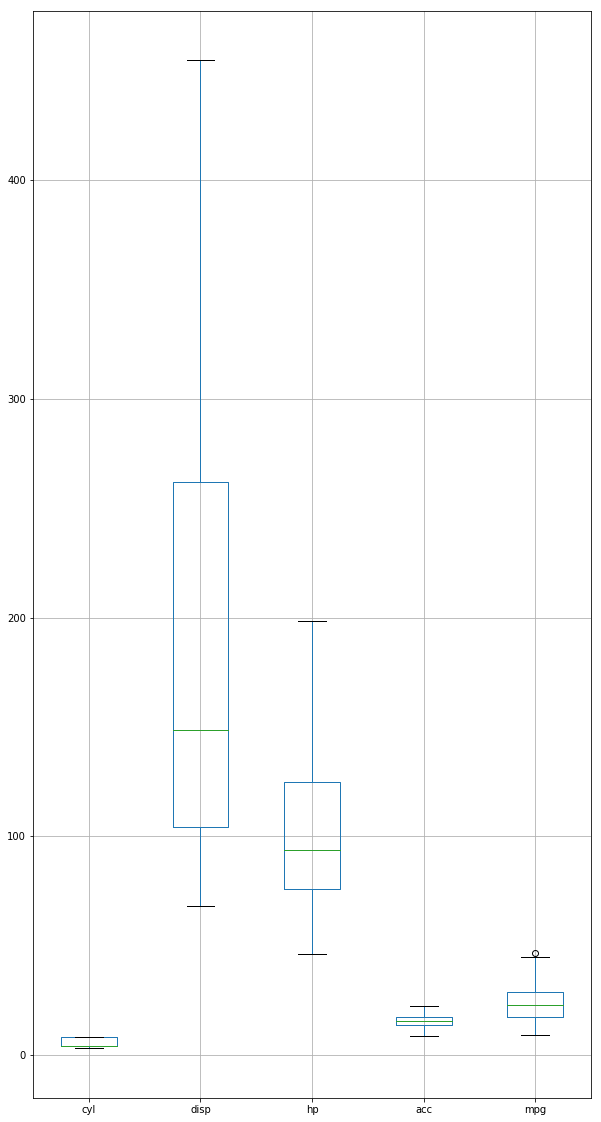

In [8]:
# plotting box plot to understand distribution post outlier treatment

bbx = cars_df.boxplot(column=['cyl', 'disp', 'hp','acc','mpg'],figsize = (10,20))

#There are less number of outliers now. SInce outliers have significant influence in distance calculation & hence on 
#kmeans clustering

In [9]:
#Step 2 :
#Use pair plot or scatter matrix to visualize how the different variables are related 
#(Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) 

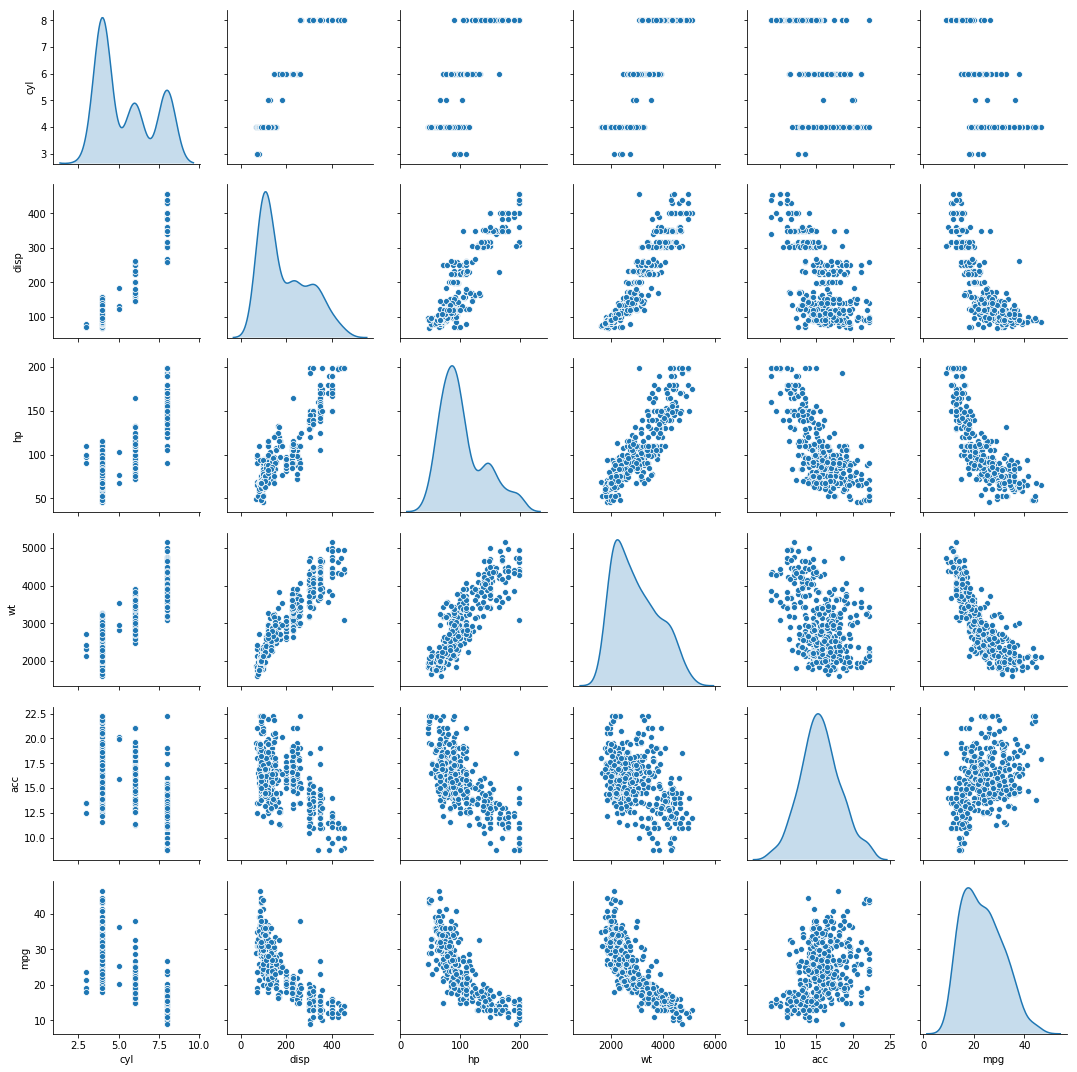

In [10]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns

cars_attr_df = cars_df.iloc[:,1:8]
cars_attr_df = cars_attr_df.drop(columns = "yr", axis = 1)
cars_attr_df.head(10)
sns.pairplot(cars_attr_df, diag_kind='kde') 

# Inference from below graph
#1. There are 3 diffrent clusters within data set when seen w.r.t cyl feature.
#2. Similarly w.r.t displacement,hp, slighly in wt & mpg we see further groups / clusters.
#3. Acc & yr doesnt significantly contribute to any further cluster formtion in dataset. However this data set can further be 
# broken into cluster based on yr - model of the car attribute. Is this inference correct ?
#3. disp-hp , disp-wt, disp-mpg, disp-acc are linearly co related
#4. hp-wt, hp-acc , wt - mpg, hp-mpg are lineraly co related


In [11]:
#Step3 :
#Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

# Using K means clustering


In [12]:
#Scale data 

from scipy.stats import zscore 
cars_attr_df_z = cars_attr_df.apply(zscore) # converting to Z score
cars_attr_df_z.head(10)

,cyl,disp,hp,wt,acc,mpg
0,1.498191,1.090604,0.713692,0.630870,-1.320595,-0.706439
1,1.498191,1.503514,1.666741,0.854333,-1.506489,-1.090751
2,1.498191,1.196232,1.258291,0.550470,-1.692383,-0.706439
3,1.498191,1.061796,1.258291,0.546923,-1.320595,-0.962647
4,1.498191,1.042591,0.985992,0.565841,-1.878278,-0.834543
5,1.498191,2.262118,2.565330,1.620492,-2.064172,-1.090751
6,1.498191,2.502182,2.578945,1.635863,-2.435960,-1.218855
7,1.498191,2.367746,2.578945,1.586204,-2.510317,-1.218855
8,1.498191,2.511784,2.578945,1.719809,-2.064172,-1.218855
9,1.498191,1.887617,2.347490,1.039961,-2.510317,-1.090751


In [13]:
# applying k means clustering technique.
# From the above pairplot we are expected to see 3 - 6 clusters in this data. So, keeping a range of 2 - 10. 

from sklearn.cluster import KMeans
from sklearn import metrics

cluster_range = range( 2, 10)   
cluster_sil_scores = []
distortion = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_attr_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  distortion.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(cars_attr_df_z, labels, metric='euclidean')) # getting silhoutte score

# combine the cluster_range and cluster_errors into a dataframe 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:20]

# inference from below silhoutte score table
#1. Out of 8 clusters, none of the clusters has a silhoutte score reaching towards 1 which indicates farthest & tighest cluster.

,num_clusters,cluster_errors,Avg Sil Score
0,2,934.171101,0.547692
1,3,597.309189,0.442969
2,4,480.295873,0.383596
3,5,428.103054,0.337805
4,6,360.289931,0.332536
5,7,326.785324,0.310328
6,8,293.022059,0.296129
7,9,278.457478,0.263924


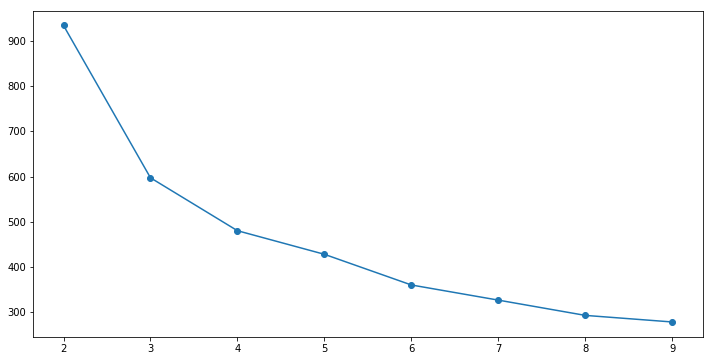

In [14]:
#plotting elbow graph to see optimal k value

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# at k=4, we are seeing a sudden drop in the distortion. So, choosing 4 as optimal k value.

In [15]:
#Using optimal k value, clustering the data
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(cars_attr_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [16]:

centroids = cluster.cluster_centers_
centroids

array([[ 1.4860546 ,  1.48450715,  1.52230972,  1.38753374, -1.07682491,
        -1.15110476],
       [-0.81998551, -0.85895557, -0.94044451, -0.85174625,  1.21903916,
         0.99149249],
       [-0.84746902, -0.75211548, -0.48749764, -0.70707286, -0.19488782,
         0.56930351],
       [ 0.40212541,  0.29436282, -0.07644656,  0.32691222,  0.36356235,
        -0.51001261]])

In [17]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_attr_df_z) )
centroid_df

,cyl,disp,hp,wt,acc,mpg
0,1.486055,1.484507,1.522310,1.387534,-1.076825,-1.151105
1,-0.819986,-0.858956,-0.940445,-0.851746,1.219039,0.991492
2,-0.847469,-0.752115,-0.487498,-0.707073,-0.194888,0.569304
3,0.402125,0.294363,-0.076447,0.326912,0.363562,-0.510013


In [18]:
prediction=cluster.predict(cars_attr_df_z)
cars_attr_df_z["GROUP"] = prediction


cars_attr_df_z.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,mpg
GROUP,,,,,,
0,97,97,97,97,97,97
1,81,81,81,81,81,81
2,133,133,133,133,133,133
3,87,87,87,87,87,87


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028EC0111160>,
      dtype=object)

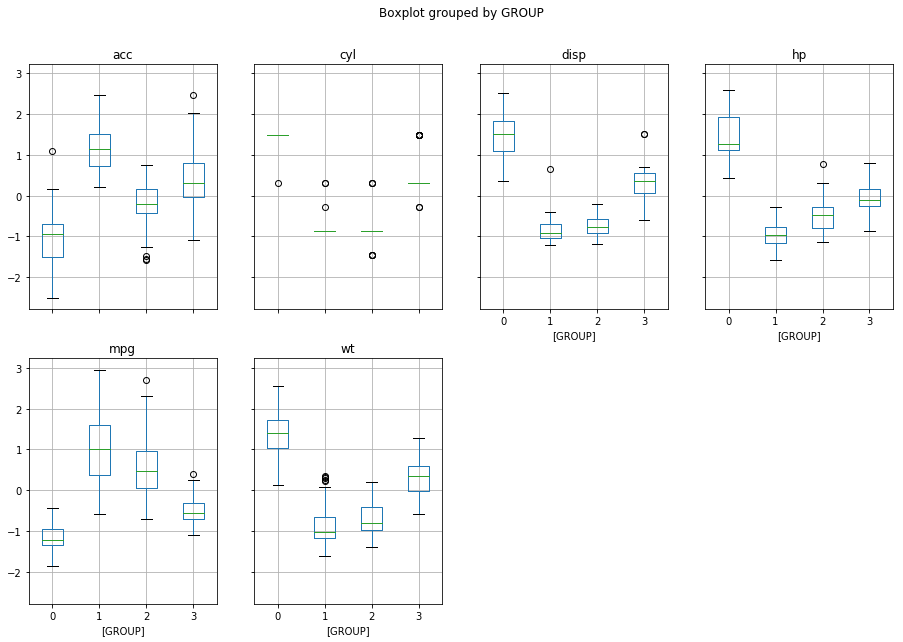

In [19]:
import matplotlib.pylab as plt

cars_attr_df_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

C:\Users\Aadee\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028EC29D6B70>,
      dtype=object)

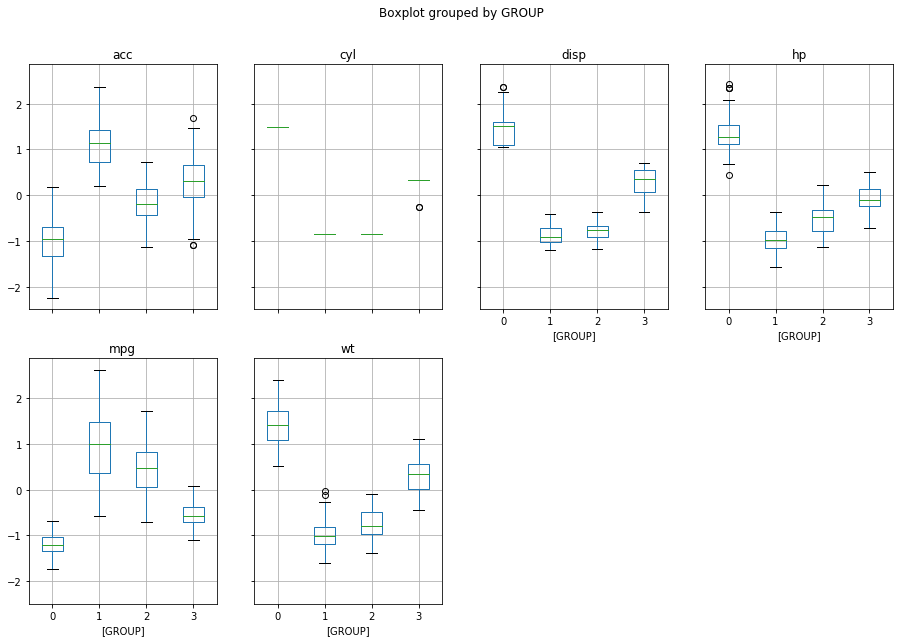

In [20]:
# There are multiple outliers at group level as per above box plot

# Addressing outliers at group level

data = cars_attr_df_z   
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median() # replacing group outliers with group median      
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_attr_df_z['GROUP']))

concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

In [21]:
# Inference from above box plot , we see further natural clusters based on displacement, hp,mpg,wt features.

In [42]:
#Step 4 :
#Use linear regression model on different clusters separately and print the coefficients of the models individually

from sklearn.linear_model import LinearRegression
cars_attr_df['GROUP'] = cars_attr_df_z['GROUP']

# creating sepearte data frames based on clusters
cars_attr_df_group0 = cars_attr_df.loc[(cars_attr_df["GROUP"] == 0)]
cars_attr_df_group1 = cars_attr_df.loc[(cars_attr_df["GROUP"] == 1)]
cars_attr_df_group2 = cars_attr_df.loc[(cars_attr_df["GROUP"] == 2)]
cars_attr_df_group3 = cars_attr_df.loc[(cars_attr_df["GROUP"] == 3)]

print("group0 data frame dimension:",cars_attr_df_group0.shape)
print("group1 data frame dimension:",cars_attr_df_group1.shape)
print("group2 data frame dimension:",cars_attr_df_group2.shape)
print("group3 data frame dimension:",cars_attr_df_group3.shape)

# We see less number of data points across groups.

group0 data frame dimension: (97, 7)
group1 data frame dimension: (81, 7)
group2 data frame dimension: (133, 7)
group3 data frame dimension: (87, 7)


In [49]:
# Splitting each cluster data point into test & train
from sklearn.model_selection import train_test_split

#For cluster 0
X0 = cars_attr_df_group0.drop("mpg",axis=1)
Y0 = cars_attr_df_group0["mpg"]
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1)
regression_model0 = LinearRegression()
regression_model0.fit(X0_train, Y0_train)
print("coefficients of model for cluster 0:",regression_model0.coef_)

#For cluster 1
X1 = cars_attr_df_group1.drop("mpg",axis=1)
Y1 = cars_attr_df_group1["mpg"]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=1)
regression_model1 = LinearRegression()
regression_model1.fit(X1_train, Y1_train)
print("coefficients of model for cluster 1:",regression_model1.coef_)

#For cluster 2
X2 = cars_attr_df_group2.drop("mpg",axis=1)
Y2 = cars_attr_df_group2["mpg"]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=1)
regression_model2 = LinearRegression()
regression_model2.fit(X2_train, Y2_train)
print("coefficients of model for cluster 2:",regression_model2.coef_)

#For cluster 3
X3 = cars_attr_df_group3.drop("mpg",axis=1)
Y3 = cars_attr_df_group3["mpg"]
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=1)
regression_model3 = LinearRegression()
regression_model3.fit(X3_train, Y3_train)
print("coefficients of model for cluster 3:",regression_model3.coef_)

coefficients of model for cluster 0: [-1.75822093e+00  6.29673704e-03 -6.24238939e-02 -1.39560216e-03
 -2.77163552e-01  0.00000000e+00]
coefficients of model for cluster 1: [ 9.41266970e+00 -8.47275497e-02 -1.99548686e-01  2.37527881e-03
 -1.02086258e+00  0.00000000e+00]
coefficients of model for cluster 2: [ 2.72745207  0.0362886  -0.17279454 -0.00359866 -0.9350995   0.        ]
coefficients of model for cluster 3: [ 1.84377106 -0.04031722  0.02027158 -0.00211662  0.11611856  0.        ]
